В якості домашнього завдання вам пропонується створити нейронну мережу за допомогою механізмів Keras, яка буде класифікувати товари із датасету fasion_mnist.

Вам належить запропонувати свою власну архітектуру мережі. Точність найнаївнішої, але адекватної нейромережі становить приблизно 91%. Точність вашої моделі повинна бути не нижчою за цей показник. Щоб досягти таких значень вам знадобиться поекспериментувати з гіперпараметрами мережі:

кількість шарів;

кількість нейронів;

функції активації;

кількість епох;

розмір батчу;

вибір оптимізатора;

різні техніки регуляризації і т.д.

Використайте вивчені техніки виявлення проблем навчання нейронної мережі, і потім поекспериментуйте.

Рішення оформіть у вигляді окремого ноутбука.

In [ ]:
# pip install tensorflow-gpu
# pip install tensorflow
from tensorflow import keras
import numpy as np

In [ ]:
import tensorflow as tf
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.utils import to_categorical

from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

num_classes = 10
num_features = np.product(x_train.shape[1:])

learning_rate = 0.0001
batch_size = 4098

steps_per_epoch = len(x_train) // batch_size

x_train, x_test = np.array(x_train, np.float32), np.array(x_test, np.float32)

x_train, x_test = x_train.reshape([-1, num_features]), x_test.reshape([-1, num_features])

x_train, x_test = x_train / 255., x_test / 255.

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras import optimizers
from keras import losses
from keras import metrics
from keras import regularizers


model = Sequential([
    Dense(4096, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.2),
    Dense(2048, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.3),
    Dense(1024, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.4),
    Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.00001)),
    Dropout(0.1),
    Dense(10, activation='softmax'),
])

model.compile(optimizer='Adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_36"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_146 (Dense)           (None, 4096)              3215360   
                                                                 
 dropout_61 (Dropout)        (None, 4096)              0         
                                                                 
 dense_147 (Dense)           (None, 2048)              8390656   
                                                                 
 dropout_62 (Dropout)        (None, 2048)              0         
                                                                 
 dense_148 (Dense)           (None, 1024)              2098176   
                                                                 
 dropout_63 (Dropout)        (None, 1024)              0         
                                                                 
 dense_149 (Dense)           (None, 512)             

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=40,
                    batch_size=batch_size,
                    steps_per_epoch=steps_per_epoch,
                    validation_data=(x_test, y_test)
                    )

Epoch 1/40
14/14 [==============================] - 4s 134ms/step - loss: 1.3553 - accuracy: 0.5111 - val_loss: 0.7576 - val_accuracy: 0.7324
Epoch 2/40
14/14 [==============================] - 1s 108ms/step - loss: 0.6569 - accuracy: 0.7767 - val_loss: 0.5984 - val_accuracy: 0.7983
Epoch 3/40
14/14 [==============================] - 2s 112ms/step - loss: 0.5484 - accuracy: 0.8245 - val_loss: 0.5023 - val_accuracy: 0.8403
Epoch 4/40
14/14 [==============================] - 1s 106ms/step - loss: 0.4712 - accuracy: 0.8501 - val_loss: 0.4673 - val_accuracy: 0.8555
Epoch 5/40
14/14 [==============================] - 1s 106ms/step - loss: 0.4301 - accuracy: 0.8654 - val_loss: 0.4511 - val_accuracy: 0.8575
Epoch 6/40
14/14 [==============================] - 1s 106ms/step - loss: 0.4021 - accuracy: 0.8742 - val_loss: 0.4295 - val_accuracy: 0.8680
Epoch 7/40
14/14 [==============================] - 1s 107ms/step - loss: 0.3780 - accuracy: 0.8831 - val_loss: 0.4387 - val_accuracy: 0.8629
Epoch 

In [ ]:
results = model.evaluate(x_test, y_test)
print(results)

313/313 [==============================] - 1s 3ms/step - loss: 0.3762 - accuracy: 0.8997
[0.37619248032569885, 0.8996999859809875]


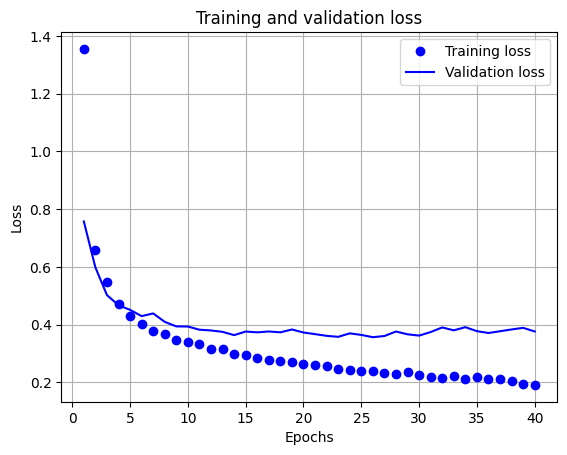

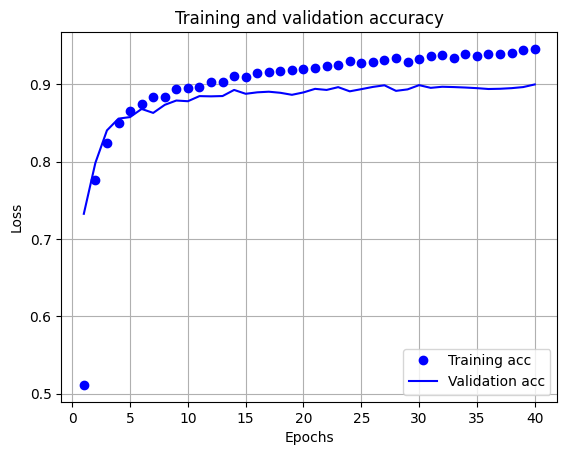

In [ ]:
# Імпортуйте бібліотеку для візуалізації даних
import matplotlib.pyplot as plt

history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

# графік втрат для навчання та валідації
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# значення точності для валідації
val_acc_values = history_dict['val_accuracy']

# графік точності для навчання та валідації
plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()